# Convolutional Neural Network

In this second exercise-notebook we will play with Convolutional Neural Network (CNN). 

As you should have seen, a CNN is a feed-forward neural network tipically composed of Convolutional, MaxPooling and Dense layers. 

If the task implemented by the CNN is a classification task, the last Dense layer should use the **Softmax** activation, and the loss should be the **categorical crossentropy**.

Reference: [https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py]()

# Training the network

We will train our network on the **CIFAR10** [dataset](https://www.cs.toronto.edu/~kriz/cifar.html), which contains `50,000` 32x32 color training images, labeled over 10 categories, and 10,000 test images. 

As this dataset is also included in Keras datasets, we just ask the `keras.datasets` module for the dataset.

Training and test images are normalized to lie in the $\left[0,1\right]$ interval.

In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils

nb_classes = 10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

Using TensorFlow backend.


In [2]:
from matplotlib import pyplot as plt

%matplotlib inline

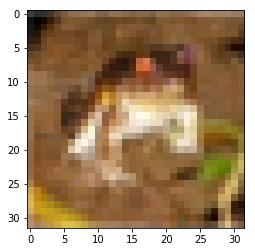

In [3]:
plt.imshow(X_train[0])

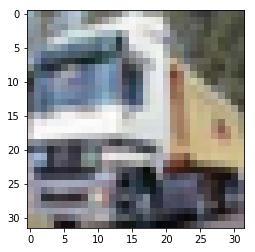

In [4]:
plt.imshow(X_train[1])


To reduce the risk of overfitting, we also apply some image transformation, like rotations, shifts and flips. All these can be easily implemented using the Keras [Image Data Generator](http://keras.io/preprocessing/image/).

#### Warning: The following cells may be computational Intensive....

In [5]:
from keras.preprocessing.image import ImageDataGenerator

generated_images = ImageDataGenerator(
    featurewise_center=True,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=True,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

generated_images.fit(X_train)

Now we can start training. 

At each iteration, a batch of 500 images is requested to the `ImageDataGenerator` object, and then fed to the network.

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
gen = generated_images.flow(X_train, Y_train, batch_size=500, shuffle=True)
X_batch, Y_batch = next(gen)

In [8]:
X_batch.shape

(500, 32, 32, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


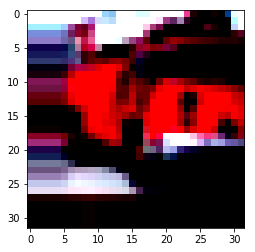

In [9]:
plt.imshow(X_batch[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


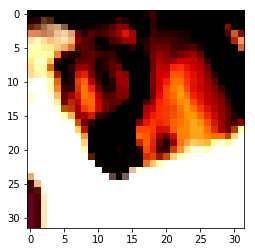

In [10]:
plt.imshow(X_batch[1])

### Create the CNN Model

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

In [12]:
## Create a ConvNet Model

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

shape_ord = X_train.shape[1:]

model = Sequential()
model.add(Conv2D(nb_filters, (nb_conv, nb_conv), 
                 padding='valid',
                 input_shape=shape_ord))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
          optimizer='sgd',
          metrics=['accuracy'])

In [13]:
from keras.utils import generic_utils

In [14]:
n_epochs = 2
for e in range(n_epochs):
    print('Epoch', e)
    batches = 0
    progbar = generic_utils.Progbar(X_train.shape[0])
    for X_batch, Y_batch in generated_images.flow(X_train, Y_train, batch_size=500, shuffle=True):
        # Please notice the `train_on_batch` method!
        loss, acc = model.train_on_batch(X_batch, Y_batch)
        # Please note how we add the logging of the metrics in the progress bar!
        progbar.add(X_batch.shape[0], values=[("train loss", loss), ("acc", acc)])
        batches += 1
        if batches >= len(X_train) / 500:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

Epoch 0
50000/50000 [==============================] - 20s 400us/step - train loss: 2.1166 - acc: 0.2280
Epoch 1
50000/50000 [==============================] - 19s 372us/step - train loss: 1.9699 - acc: 0.2956
